YASSIR ETA PREDICTION
Hypotheses
1. Yassir has more rides during the weekend than weekdays
2. The ETAs are shorter during night time than during the day.
Questions
1. What weather conditions causes the ETAs to fluctuate the most
2.Does different times in the day have relatively same ETAs(in terms of being longer or shorter during the day or night)
3. Does rainfall increase the ETA of a trip

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --q

     \ 22.6 MB 21.2 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from google.colab import files,drive
import io,os, pickle,sklearn
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import cluster
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn import pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans , MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
pt = PowerTransformer()
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/CapTest.csv")
train_data = pd.read_csv("/content/drive/MyDrive/CapTrain.csv")
weather = pd.read_csv("/content/drive/MyDrive/Weather.csv")

In [ ]:
train_data.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


In [ ]:
test_data.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance
0,000V4BQX,2019-12-21T05:52:37Z,2.981,36.688,2.978,36.754,17549
1,003WBC5J,2019-12-25T21:38:53Z,3.032,36.769,3.074,36.751,7532
2,004O4X3A,2019-12-29T21:30:29Z,3.035,36.711,3.010,36.758,10194
3,006CEI5B,2019-12-31T22:51:57Z,2.902,36.738,3.208,36.698,32768
4,009G0M2T,2019-12-28T21:47:22Z,2.860,36.692,2.828,36.696,4513


In [ ]:
weather.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [ ]:
train_data.drop(['ID'],axis=1, inplace = True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        83924 non-null  object 
 1   Origin_lat       83924 non-null  float64
 2   Origin_lon       83924 non-null  float64
 3   Destination_lat  83924 non-null  float64
 4   Destination_lon  83924 non-null  float64
 5   Trip_distance    83924 non-null  int64  
 6   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 4.5+ MB


In [ ]:
train_data.shape

(83924, 7)

In [ ]:
weather.isnull().sum()

date                          0
dewpoint_2m_temperature       0
maximum_2m_air_temperature    0
mean_2m_air_temperature       0
mean_sea_level_pressure       0
minimum_2m_air_temperature    0
surface_pressure              0
total_precipitation           0
u_component_of_wind_10m       0
v_component_of_wind_10m       0
dtype: int64

Changing the Timestamp column from object datatype to timestamp

In [ ]:
train_data['Timestamp'] = train_data['Timestamp'].astype('datetime64')
train_data.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784
1,2019-12-10 22:37:09,3.087,36.707,3.081,36.727,3918,576
2,2019-11-23 20:36:10,3.144,36.739,3.088,36.742,7265,526
3,2019-12-01 05:43:21,3.239,36.784,3.054,36.763,23350,3130
4,2019-12-17 20:30:20,2.912,36.707,3.207,36.698,36613,2138


Checking for completeness of dates

In [ ]:
expected_dates = pd.date_range(start=train_data['Timestamp'].min(),end =
                               train_data['Timestamp'].max())
expected_dates

DatetimeIndex(['2019-11-19 23:00:08', '2019-11-20 23:00:08',
               '2019-11-21 23:00:08', '2019-11-22 23:00:08',
               '2019-11-23 23:00:08', '2019-11-24 23:00:08',
               '2019-11-25 23:00:08', '2019-11-26 23:00:08',
               '2019-11-27 23:00:08', '2019-11-28 23:00:08',
               '2019-11-29 23:00:08', '2019-11-30 23:00:08',
               '2019-12-01 23:00:08', '2019-12-02 23:00:08',
               '2019-12-03 23:00:08', '2019-12-04 23:00:08',
               '2019-12-05 23:00:08', '2019-12-06 23:00:08',
               '2019-12-07 23:00:08', '2019-12-08 23:00:08',
               '2019-12-09 23:00:08', '2019-12-10 23:00:08',
               '2019-12-11 23:00:08', '2019-12-12 23:00:08',
               '2019-12-13 23:00:08', '2019-12-14 23:00:08',
               '2019-12-15 23:00:08', '2019-12-16 23:00:08',
               '2019-12-17 23:00:08', '2019-12-18 23:00:08',
               '2019-12-19 23:00:08'],
              dtype='datetime64[ns]', freq='D'

From expected dates data is from 11pm 19th November 2019 to 11pm 18th December 2019

In [ ]:
missing_times=set(expected_dates)- set(train_data['Timestamp'].unique())
missing_times

{Timestamp('2019-11-19 23:00:08', freq='D'),
 Timestamp('2019-11-20 23:00:08', freq='D'),
 Timestamp('2019-11-21 23:00:08', freq='D'),
 Timestamp('2019-11-22 23:00:08', freq='D'),
 Timestamp('2019-11-23 23:00:08', freq='D'),
 Timestamp('2019-11-24 23:00:08', freq='D'),
 Timestamp('2019-11-25 23:00:08', freq='D'),
 Timestamp('2019-11-26 23:00:08', freq='D'),
 Timestamp('2019-11-27 23:00:08', freq='D'),
 Timestamp('2019-11-28 23:00:08', freq='D'),
 Timestamp('2019-11-29 23:00:08', freq='D'),
 Timestamp('2019-11-30 23:00:08', freq='D'),
 Timestamp('2019-12-01 23:00:08', freq='D'),
 Timestamp('2019-12-02 23:00:08', freq='D'),
 Timestamp('2019-12-03 23:00:08', freq='D'),
 Timestamp('2019-12-04 23:00:08', freq='D'),
 Timestamp('2019-12-05 23:00:08', freq='D'),
 Timestamp('2019-12-06 23:00:08', freq='D'),
 Timestamp('2019-12-07 23:00:08', freq='D'),
 Timestamp('2019-12-08 23:00:08', freq='D'),
 Timestamp('2019-12-09 23:00:08', freq='D'),
 Timestamp('2019-12-10 23:00:08', freq='D'),
 Timestamp

In [ ]:
test_data['Timestamp'] = test_data['Timestamp'].astype('datetime64')
test_data.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance
0,000V4BQX,2019-12-21 05:52:37,2.981,36.688,2.978,36.754,17549
1,003WBC5J,2019-12-25 21:38:53,3.032,36.769,3.074,36.751,7532
2,004O4X3A,2019-12-29 21:30:29,3.035,36.711,3.010,36.758,10194
3,006CEI5B,2019-12-31 22:51:57,2.902,36.738,3.208,36.698,32768
4,009G0M2T,2019-12-28 21:47:22,2.860,36.692,2.828,36.696,4513


In [ ]:
# Set time of day based on your specified time frames
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('23:59', '4:30'), 'Time_ofthe_day'] = 'mid-night'
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('4:30', '12:00'), 'Time_ofthe_day'] = 'morning'
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('12:00', '16:30'), 'Time_ofthe_day'] = 'afternoon'
train_data.loc[train_data.set_index('Timestamp').index.indexer_between_time('16:30', '23:59'), 'Time_ofthe_day'] = 'evening'
test_data.loc[test_data.set_index('Timestamp').index.indexer_between_time('23:59', '4:30'), 'Time_ofthe_day'] = 'mid-night'
test_data.loc[test_data.set_index('Timestamp').index.indexer_between_time('4:30', '12:00'), 'Time_ofthe_day'] = 'morning'
test_data.loc[test_data.set_index('Timestamp').index.indexer_between_time('12:00', '16:30'), 'Time_ofthe_day'] = 'afternoon'
test_data.loc[test_data.set_index('Timestamp').index.indexer_between_time('16:30', '23:59'), 'Time_ofthe_day'] = 'evening'

In [ ]:
train_data.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time_ofthe_day
0,2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,evening
1,2019-12-10 22:37:09,3.087,36.707,3.081,36.727,3918,576,evening
2,2019-11-23 20:36:10,3.144,36.739,3.088,36.742,7265,526,evening
3,2019-12-01 05:43:21,3.239,36.784,3.054,36.763,23350,3130,morning
4,2019-12-17 20:30:20,2.912,36.707,3.207,36.698,36613,2138,evening


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        61 non-null     object 
 1   dewpoint_2m_temperature     61 non-null     float64
 2   maximum_2m_air_temperature  61 non-null     float64
 3   mean_2m_air_temperature     61 non-null     float64
 4   mean_sea_level_pressure     61 non-null     float64
 5   minimum_2m_air_temperature  61 non-null     float64
 6   surface_pressure            61 non-null     float64
 7   total_precipitation         61 non-null     float64
 8   u_component_of_wind_10m     61 non-null     float64
 9   v_component_of_wind_10m     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB


In [ ]:
weather['date'] = pd.to_datetime(weather['date'])
weather.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [ ]:
train_data["date"]=train_data["Timestamp"].dt.date
train_data["date"]=pd.to_datetime(train_data["date"])
train_data.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time_ofthe_day,date
0,2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,evening,2019-12-04
1,2019-12-10 22:37:09,3.087,36.707,3.081,36.727,3918,576,evening,2019-12-10
2,2019-11-23 20:36:10,3.144,36.739,3.088,36.742,7265,526,evening,2019-11-23
3,2019-12-01 05:43:21,3.239,36.784,3.054,36.763,23350,3130,morning,2019-12-01
4,2019-12-17 20:30:20,2.912,36.707,3.207,36.698,36613,2138,evening,2019-12-17


In [ ]:
train_data.shape

(83924, 9)

In [ ]:


merge=pd.merge(train_data,weather, how='inner', on='date')
merge.shape

(83924, 18)

In [ ]:
merge.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time_ofthe_day,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
1,2019-12-04 22:00:44,3.046,36.738,3.147,36.721,12739,1029,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
2,2019-12-04 23:49:23,2.869,36.731,3.070,36.744,24341,1202,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
3,2019-12-04 23:16:15,3.004,36.797,3.055,36.773,11520,1252,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
4,2019-12-04 20:48:01,2.906,36.710,3.049,36.750,19087,1728,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786


In [ ]:
merge =merge.set_index('Timestamp')
merge.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time_ofthe_day,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
Timestamp,,,,,,,,,,,,,,,,,
2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
2019-12-04 22:00:44,3.046,36.738,3.147,36.721,12739,1029,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
2019-12-04 23:49:23,2.869,36.731,3.070,36.744,24341,1202,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
2019-12-04 23:16:15,3.004,36.797,3.055,36.773,11520,1252,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
2019-12-04 20:48:01,2.906,36.710,3.049,36.750,19087,1728,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786


In [ ]:
merge.isnull().sum()

Origin_lat                    0
Origin_lon                    0
Destination_lat               0
Destination_lon               0
Trip_distance                 0
ETA                           0
Time_ofthe_day                0
date                          0
dewpoint_2m_temperature       0
maximum_2m_air_temperature    0
mean_2m_air_temperature       0
mean_sea_level_pressure       0
minimum_2m_air_temperature    0
surface_pressure              0
total_precipitation           0
u_component_of_wind_10m       0
v_component_of_wind_10m       0
dtype: int64

In [ ]:
merge.index

DatetimeIndex(['2019-12-04 20:01:50', '2019-12-04 22:00:44',
               '2019-12-04 23:49:23', '2019-12-04 23:16:15',
               '2019-12-04 20:48:01', '2019-12-04 05:53:15',
               '2019-12-04 05:17:32', '2019-12-04 21:43:37',
               '2019-12-04 00:53:39', '2019-12-04 05:42:09',
               ...
               '2019-11-19 23:23:02', '2019-11-19 23:35:02',
               '2019-11-19 23:54:08', '2019-11-19 23:56:19',
               '2019-11-19 23:04:03', '2019-11-19 23:11:54',
               '2019-11-19 23:02:02', '2019-11-19 23:46:58',
               '2019-11-19 23:53:16', '2019-11-19 23:17:59'],
              dtype='datetime64[ns]', name='Timestamp', length=83924, freq=None)

In [ ]:
# Analyzing timestamp column using pandas time-based indexing
merge['Month'] =merge.index.month
merge['Days'] =merge.index.day_name()
merge.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time_ofthe_day,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,Month,Days
Timestamp,,,,,,,,,,,,,,,,,,,
2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday
2019-12-04 22:00:44,3.046,36.738,3.147,36.721,12739,1029,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday
2019-12-04 23:49:23,2.869,36.731,3.070,36.744,24341,1202,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday
2019-12-04 23:16:15,3.004,36.797,3.055,36.773,11520,1252,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday
2019-12-04 20:48:01,2.906,36.710,3.049,36.750,19087,1728,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday


Checking for outliers in the ETA column with the use of a box plot

<AxesSubplot:xlabel='ETA'>

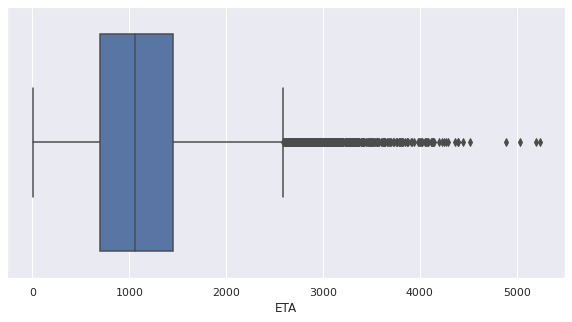

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(train_data['ETA'])

Hypothesis 1

In [ ]:
# Adding weekend or no weekend column by mapping days of the week with the use of a dictionary
merge['Weekend/Weekday']= merge['Days'].map(
                              {'Monday':'Weekday','Tuesday':'Weekday','Wednesday':'Weekday','Thursday':'Weekday',
                                                     'Friday':'Weekday', 'Saturday': 'Weekend','Sunday':'Weekend'})


<AxesSubplot:xlabel='ETA', ylabel='Trip_distance'>

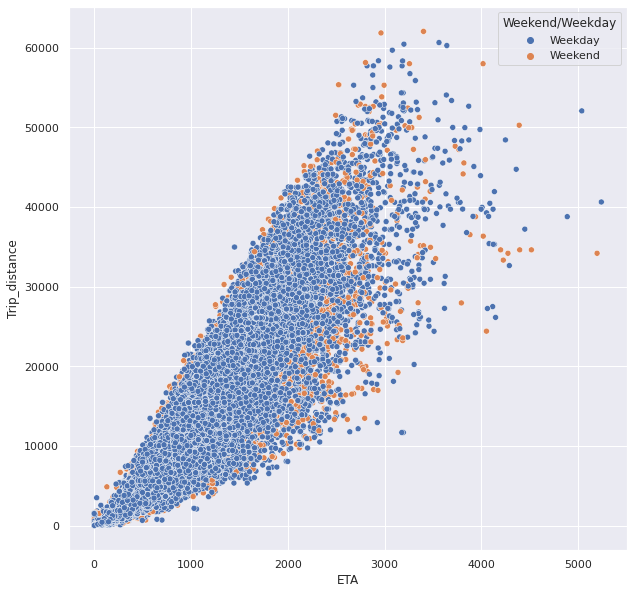

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(data= merge, x="ETA", y = 'Trip_distance',hue= "Weekend/Weekday")

From the plot above, I assume that every trip made has 1 recorded ETA and Trip distance.Hence to find out if more trips are recorded during the weekends or the weekdays the trip's distance and ETA where used and from the scatter plot above we can see that more trips are recorded during the weekdays than the weekends

Hypothesis 2

The ETAs are shorter during night time than during the day.

Questions

2.Does different times in the day have relatively same ETAs(in terms of being longer or shorter during the day or night)

In [ ]:

fig = px.box(train_data, x= 'ETA', y="Trip_distance", color="Time_ofthe_day", 
             title=f"A visual representation of the trips' EDA with respect Time of the Day "
            )
fig.show()

From the plot above, we can see that trips during mid-night have have shorter ETAs

In [ ]:
merge.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time_ofthe_day,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,Month,Days,Weekend/Weekday
Timestamp,,,,,,,,,,,,,,,,,,,,
2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday,Weekday
2019-12-04 22:00:44,3.046,36.738,3.147,36.721,12739,1029,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday,Weekday
2019-12-04 23:49:23,2.869,36.731,3.070,36.744,24341,1202,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday,Weekday
2019-12-04 23:16:15,3.004,36.797,3.055,36.773,11520,1252,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday,Weekday
2019-12-04 20:48:01,2.906,36.710,3.049,36.750,19087,1728,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,Wednesday,Weekday


Encoding days and time of the day columns using ordinal encoding

In [ ]:
merge['Time_ofthe_day'].unique()

array(['evening', 'morning', 'mid-night'], dtype=object)

In [ ]:
merge['Days_encoded']= merge['Days'].map(
                              {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5, 'Saturday': 6,'Sunday':7})

In [ ]:
merge['times_encoded']= merge['Time_ofthe_day'].map(
                              {'morning':1,'evening':2,'mid-night':3 })

In [ ]:
merge.dewpoint_2m_temperature.min(),merge.dewpoint_2m_temperature.max()

(279.516693115234, 286.326782226562)

In [ ]:
merge.drop(['date','Weekend/Weekday','Days','Time_ofthe_day'],axis=1, inplace = True)
merge.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,Month,Days_encoded,times_encoded
Timestamp,,,,,,,,,,,,,,,,,,
2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2
2019-12-04 22:00:44,3.046,36.738,3.147,36.721,12739,1029,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2
2019-12-04 23:49:23,2.869,36.731,3.070,36.744,24341,1202,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2
2019-12-04 23:16:15,3.004,36.797,3.055,36.773,11520,1252,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2
2019-12-04 20:48:01,2.906,36.710,3.049,36.750,19087,1728,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2


In [ ]:
merge.shape

(83924, 18)

In [ ]:
merge.times_encoded.unique()

array([2, 1, 3])

Clustering on GPS Coordinate

In [ ]:
#trip clustering
kmean=KMeans(n_clusters=8,random_state= 0)

trip_info = merge[['Origin_lat','Origin_lon','Destination_lat','Destination_lon']]

merge["cluster_id"]=kmean.fit_predict(trip_info )
merge["cluster_id"]=merge["cluster_id"].astype('category')

In [ ]:
merge.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,Month,Days_encoded,times_encoded,cluster_id
Timestamp,,,,,,,,,,,,,,,,,,,
2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,7
2019-12-04 22:00:44,3.046,36.738,3.147,36.721,12739,1029,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,3
2019-12-04 23:49:23,2.869,36.731,3.070,36.744,24341,1202,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,0
2019-12-04 23:16:15,3.004,36.797,3.055,36.773,11520,1252,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,4
2019-12-04 20:48:01,2.906,36.710,3.049,36.750,19087,1728,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,0


skewness :  0.6815198669330323


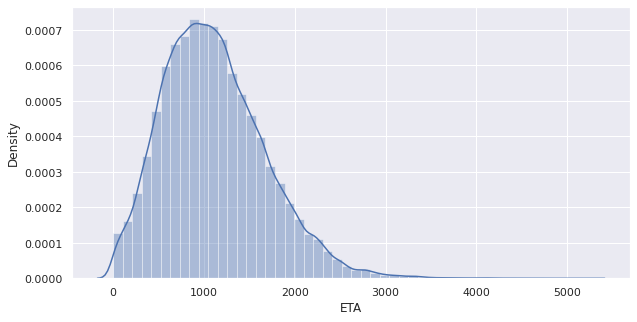

In [ ]:
target = merge["ETA"]
sns.distplot(target)
print("skewness : ",stats.skew(target.values))

Train,Evaluation Split

In [ ]:
# make sure sorted by date
training = merge.sort_values('Timestamp')
train_df = merge.iloc[:-20000]
eval = merge.iloc[-20000:]
eval.shape,train_df.shape

((20000, 19), (63924, 19))

Modeling


Simple Linear Regression

In [ ]:
y = train_df["ETA"]
X = train_df.drop(columns = ["ETA"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(47943, 18) (47943,)
(15981, 18) (15981,)


In [ ]:
##Linear Regression
lr_model = LinearRegression()
model = lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

In [ ]:
# get feature importance
importance = lr_model.coef_
# Converting the feature importance data into a dataframe
importance = pd.DataFrame(importance, columns = ["score"]).reset_index()
importance["Feature"] = list(X.columns)
importance.drop(columns = ["index"], inplace = True)
importance.sort_values(by = "score", ascending = False)
importance
# Visualizing the feature importance
fig = px.bar(importance, x = "Feature", y = "score")
fig.show()


In [ ]:
# Predicting and Evaluating the Linear Regression model
prediction = lr_model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
lr_rmse = np.sqrt(mse)
print(mse)
print(lr_rmse)

59202.232021192576
243.31508794399204


**Random** **Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 
                           'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [ ]:
## Feature Importance of the Random Forest Model
rf_importance = rf.feature_importances_
rf_importance = pd.DataFrame(rf_importance, columns = ["score"]).reset_index()
rf_importance["Feature"] = list(X.columns)
rf_importance.drop(columns = ["index"], inplace = True)
rf_importance.sort_values(by = "score", ascending = False).head()
# Visualizing the feature importance
fig = px.bar(rf_importance, x = "Feature", y = "score")
fig.show()


In [ ]:
rf_predict = rf.predict(X_test)
mse = mean_squared_error(y_test,rf_predict)
rf_rmse = mse**.05
print(mse)
print(rf_rmse)

88685.3937429555
1.7676350517612256


Decision Tree Model

In [ ]:
dt_model = DecisionTreeRegressor(max_features = "auto", random_state = 20)
dt_model = dt_model.fit(X_train, y_train)

In [ ]:
dt_importance = dt_model.feature_importances_
dt_importance = pd.DataFrame(dt_importance, columns = ["score"]).reset_index()
dt_importance["Feature"] = list(X.columns)
dt_importance.drop(columns = ["index"], inplace = True)
dt_importance.sort_values(by = "score", ascending = False).head()
# Visualizing the feature importance
fig = px.bar(dt_importance, x = "Feature", y = "score")
fig.show()

In [ ]:
# Predicting and Evaluating the decision tree  model
predict = dt_model.predict(X_test)
mse = mean_squared_error(y_test, predict)
dt_rmse = np.sqrt(mse)
print(mse)
print(dt_rmse)

45115.80844928487
212.40482209517955


**ADABOOST MODEL**

In [ ]:
ADAB = AdaBoostClassifier(random_state = 20)
ADAB.fit(X_train, y_train)

AdaBoostClassifier(random_state=20)

In [ ]:
ADAB_importance = ADAB.feature_importances_
ADAB_importance = pd.DataFrame(ADAB_importance, columns = ["score"]).reset_index()
ADAB_importance["Feature"] = list(X.columns)
ADAB_importance.drop(columns = ["index"], inplace = True)
ADAB_importance.sort_values(by = "score", ascending = False).head()
# Visualizing the feature importance
fig = px.bar(ADAB_importance, x = "Feature", y = "score")
fig.show()

In [ ]:
# Predicting and Evaluating the Adaboost model
AD_predict = ADAB.predict(X_test)
mse = mean_squared_error(y_test, AD_predict)
ADrmse = np.sqrt(mse)
print(mse)
print(ADrmse)

318470.39959952445
564.3318169300084


**K-Nearrest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, \
                           metric = 'minkowski', p = 2
                          )
knn_model = knn.fit(X_train, y_train)

In [ ]:
# Predicting and Evaluating the Adaboost model
KN_predict = knn.predict(X_test)
mse = mean_squared_error(y_test,KN_predict)
KN_rmse = np.sqrt(mse)
print(mse)
print(KN_rmse)

102920.04768162193
320.81154543068106


Comparing Model Performances

In [ ]:
model_scores = pd.DataFrame({"models":[lr_model,rf,dt_model,ADAB,knn_model], 
                             "rmse":[lr_rmse,rf_rmse,dt_rmse,ADrmse,KN_rmse]})
model_scores 

,models,rmse
0,LinearRegression(),243.315088
1,"(DecisionTreeRegressor(max_depth=5, max_featur...",1.767635
2,"DecisionTreeRegressor(max_features='auto', ran...",212.404822
3,"(DecisionTreeClassifier(max_depth=1, random_st...",564.331817
4,KNeighborsClassifier(),320.811545


**Improving Models**

In [ ]:
merge.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,Month,Days_encoded,times_encoded,cluster_id
Timestamp,,,,,,,,,,,,,,,,,,,
2019-12-04 20:01:50,3.258,36.777,3.003,36.718,39627,2784,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,7
2019-12-04 22:00:44,3.046,36.738,3.147,36.721,12739,1029,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,3
2019-12-04 23:49:23,2.869,36.731,3.070,36.744,24341,1202,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,0
2019-12-04 23:16:15,3.004,36.797,3.055,36.773,11520,1252,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,4
2019-12-04 20:48:01,2.906,36.710,3.049,36.750,19087,1728,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786,12,3,2,0


**Scaling and  Feature Selection**

In [ ]:
scale = MinMaxScaler()
cols_to_scale =list( train_df.columns)
cols_to_scale.remove('ETA')
train_df[cols_to_scale] = scale.fit_transform(train_df[cols_to_scale])

In [ ]:
train_df.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,Month,Days_encoded,times_encoded,cluster_id
Timestamp,,,,,,,,,,,,,,,,,,,
2019-12-04 20:01:50,0.787086,0.811404,0.341463,0.547085,0.638851,2784,0.518474,0.0,0.0,0.152289,0.667744,0.15029,0.633776,0.548837,0.527821,1.0,0.333333,0.5,1.000000
2019-12-04 22:00:44,0.417103,0.640351,0.592334,0.560538,0.205362,1029,0.518474,0.0,0.0,0.152289,0.667744,0.15029,0.633776,0.548837,0.527821,1.0,0.333333,0.5,0.428571
2019-12-04 23:49:23,0.108202,0.609649,0.458188,0.663677,0.392410,1202,0.518474,0.0,0.0,0.152289,0.667744,0.15029,0.633776,0.548837,0.527821,1.0,0.333333,0.5,0.000000
2019-12-04 23:16:15,0.343805,0.899123,0.432056,0.793722,0.185709,1252,0.518474,0.0,0.0,0.152289,0.667744,0.15029,0.633776,0.548837,0.527821,1.0,0.333333,0.5,0.571429
2019-12-04 20:48:01,0.172775,0.517544,0.421603,0.690583,0.307705,1728,0.518474,0.0,0.0,0.152289,0.667744,0.15029,0.633776,0.548837,0.527821,1.0,0.333333,0.5,0.000000


In [ ]:
train_df.drop(columns = ['surface_pressure','total_precipitation','Month','Days_encoded','mean_sea_level_pressure','u_component_of_wind_10m','v_component_of_wind_10m']
              ,axis=1, inplace = True)

In [ ]:
y = train_df["ETA"]
X = train_df.drop(columns = ['ETA'])

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(Xs_train.shape, ys_train.shape)
print(Xs_test.shape, ys_test.shape)

NameError: ignored

In [ ]:
rf_scaled = RandomForestRegressor(n_estimators = 300, max_features = 
                           'sqrt', max_depth = 5, random_state = 18).fit(Xs_train, ys_train)


In [ ]:
X.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,times_encoded,cluster_id
Timestamp,,,,,,,,,,,
2019-12-04 20:01:50,0.787086,0.811404,0.341463,0.547085,0.638851,0.518474,0.0,0.0,0.667744,0.5,1.000000
2019-12-04 22:00:44,0.417103,0.640351,0.592334,0.560538,0.205362,0.518474,0.0,0.0,0.667744,0.5,0.428571
2019-12-04 23:49:23,0.108202,0.609649,0.458188,0.663677,0.392410,0.518474,0.0,0.0,0.667744,0.5,0.000000
2019-12-04 23:16:15,0.343805,0.899123,0.432056,0.793722,0.185709,0.518474,0.0,0.0,0.667744,0.5,0.571429
2019-12-04 20:48:01,0.172775,0.517544,0.421603,0.690583,0.307705,0.518474,0.0,0.0,0.667744,0.5,0.000000


rf_importance["Feature"] = list(train_df.drop("ETA").columns)

In [ ]:
## Feature Importance of the Random Forest Model
rf_importance = rf_scaled.feature_importances_
rf_importance = pd.DataFrame(rf_importance, columns = ["score"]).reset_index()
rf_importance["Feature"] = list(X.columns)
rf_importance.drop(columns = ["index"], inplace = True)
rf_importance.sort_values(by = "score", ascending = False).head()
# Visualizing the feature importance
fig = px.bar(rf_importance, x = "Feature", y = "score")
fig.show()

In [ ]:
rfs_predict = rf_scaled.predict(Xs_test)
mse = mean_squared_error(ys_test, rfs_predict)
rf_rmse = mse**.05
print(mse)
print(rf_rmse)

72174.00389373244
1.7495205170893233


Performance of random forest which happened to the best model reduced after scaling. Rmse reduced from 1.77 to 1.75

**Linear Regression Model after Scaling**

In [ ]:
##Linear Regression
slr_model = LinearRegression()
slr_model = slr_model.fit(Xs_train, ys_train)
predictions = slr_model.predict(Xs_test)

In [ ]:
# get feature importance
importance = slr_model.coef_
# Converting the feature importance data into a dataframe
importance = pd.DataFrame(importance, columns = ["score"]).reset_index()
importance["Feature"] = list(X.columns)
importance.drop(columns = ["index"], inplace = True)
importance.sort_values(by = "score", ascending = False)
importance
# Visualizing the feature importance
fig = px.bar(importance, x = "Feature", y = "score")
fig.show()

In [ ]:
# Predicting and Evaluating the Linear Regression model
slr_predict = slr_model.predict(Xs_test)
mse = mean_squared_error(ys_test,slr_predict)
slr_rmse = np.sqrt(mse)
print(mse)
print(lr_rmse)

59224.22073020154
243.31508794399204


Linear regression model performance remain the same after scaling and feature selection,mostly because features that were dropped were mostly not useful to the random forest which happens to be the best model

**Cross Validation and Hyperparameter Tuning on best model**

**Randomised Search CV**

In [ ]:
n_estimators = list(range(10, 101, 10))
# Defining the values and instantiating the grid to be used in the RandomizedSearch
random_grid = { 'n_estimators':[50,600,100],
               'max_features': ['auto', 'sqrt'], 
               "max_depth":[20,100],
               #'min_samples_leaf':3 ,
               # "min_samples_split": 2,
               'bootstrap':[True, False]}
    # Number of features to consider at every split


# Running the RandomizedSearch Cross-Validation with the grid
rf_cv = RandomizedSearchCV ( estimator= rf_scaled,
                             param_distributions= random_grid,
                             n_iter= 5,
                             cv= 5,
                             verbose=2,
                             random_state= 24,
                             n_jobs= -1)
rf_cv.fit(Xs_train, ys_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=5,
                                                   max_features='sqrt',
                                                   n_estimators=300,
                                                   random_state=18),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 600, 100]},
                   random_state=24, verbose=2)

In [ ]:
# Looking at the best combination of hyperparameters for the model
best_params = rf_cv.best_params_
print("The best combination of hyperparameters for the model will be:")

for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")

The best combination of hyperparameters for the model will be:
bootstrap: False
max_depth: 20
max_features: sqrt
n_estimators: 600


In [ ]:
# Defining the best version of the model with the best parameters
best_rf_model = RandomForestRegressor(bootstrap = False,
                                       criterion= "squared_error",
                                       max_depth= 20,
                                       max_features= "sqrt",
                                       n_estimators= 600,
                                       random_state= 24)
                                      
# Fitting the model to the training data
best_rf_model = best_rf_model.fit(Xs_train, ys_train)

In [ ]:
rfb_predict =best_rf_model.predict(Xs_test)
mse = mean_squared_error(ys_test, rfb_predict)
rfb_rmse = mse**.05
print(mse)
print(rfb_rmse)

22323.284091266003
1.6498250914617696


In [ ]:
test_data.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,Time_ofthe_day
0,000V4BQX,2019-12-21 05:52:37,2.981,36.688,2.978,36.754,17549,morning
1,003WBC5J,2019-12-25 21:38:53,3.032,36.769,3.074,36.751,7532,evening
2,004O4X3A,2019-12-29 21:30:29,3.035,36.711,3.010,36.758,10194,evening
3,006CEI5B,2019-12-31 22:51:57,2.902,36.738,3.208,36.698,32768,evening
4,009G0M2T,2019-12-28 21:47:22,2.860,36.692,2.828,36.696,4513,evening


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35625 entries, 0 to 35624
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               35625 non-null  object        
 1   Timestamp        35625 non-null  datetime64[ns]
 2   Origin_lat       35625 non-null  float64       
 3   Origin_lon       35625 non-null  float64       
 4   Destination_lat  35625 non-null  float64       
 5   Destination_lon  35625 non-null  float64       
 6   Trip_distance    35625 non-null  int64         
 7   Time_ofthe_day   35625 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.2+ MB


In [ ]:
test_data['Timestamp'] = test_data['Timestamp'].astype('datetime64')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35625 entries, 0 to 35624
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               35625 non-null  object        
 1   Timestamp        35625 non-null  datetime64[ns]
 2   Origin_lat       35625 non-null  float64       
 3   Origin_lon       35625 non-null  float64       
 4   Destination_lat  35625 non-null  float64       
 5   Destination_lon  35625 non-null  float64       
 6   Trip_distance    35625 non-null  int64         
 7   Time_ofthe_day   35625 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.2+ MB


In [ ]:
test_data["date"]=train_data["Timestamp"].dt.date
test_data['date'] = test_data['date'].astype('datetime64')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35625 entries, 0 to 35624
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               35625 non-null  object        
 1   Timestamp        35625 non-null  datetime64[ns]
 2   Origin_lat       35625 non-null  float64       
 3   Origin_lon       35625 non-null  float64       
 4   Destination_lat  35625 non-null  float64       
 5   Destination_lon  35625 non-null  float64       
 6   Trip_distance    35625 non-null  int64         
 7   Time_ofthe_day   35625 non-null  object        
 8   date             35625 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        61 non-null     datetime64[ns]
 1   dewpoint_2m_temperature     61 non-null     float64       
 2   maximum_2m_air_temperature  61 non-null     float64       
 3   mean_2m_air_temperature     61 non-null     float64       
 4   mean_sea_level_pressure     61 non-null     float64       
 5   minimum_2m_air_temperature  61 non-null     float64       
 6   surface_pressure            61 non-null     float64       
 7   total_precipitation         61 non-null     float64       
 8   u_component_of_wind_10m     61 non-null     float64       
 9   v_component_of_wind_10m     61 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.9 KB


In [ ]:
merge_test=pd.merge(test_data,weather, how='inner', on='date')
merge_test.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,Time_ofthe_day,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,000V4BQX,2019-12-21 05:52:37,2.981,36.688,2.978,36.754,17549,morning,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
1,01BFEF3D,2019-12-28 01:40:15,2.948,36.751,3.185,36.732,27688,mid-night,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
2,02OAKS3W,2019-12-22 21:22:30,3.013,36.724,3.060,36.774,16027,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
3,03U3P3FB,2019-12-29 20:27:43,2.995,36.750,3.003,36.743,1574,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786
4,04MS371O,2019-12-20 21:08:50,3.040,36.741,3.043,36.717,5711,evening,2019-12-04,283.047546,288.319153,286.984436,100523.0625,286.00177,99474.21875,0.00578,1.914582,2.437786


In [ ]:
merge_test['times_encoded']= merge_test['Time_ofthe_day'].map(
                              {'morning':1,'evening':2,'mid-night':3 })


In [ ]:
merge_test.isnull().sum()

ID                            0
Timestamp                     0
Origin_lat                    0
Origin_lon                    0
Destination_lat               0
Destination_lon               0
Trip_distance                 0
Time_ofthe_day                0
date                          0
dewpoint_2m_temperature       0
maximum_2m_air_temperature    0
mean_2m_air_temperature       0
mean_sea_level_pressure       0
minimum_2m_air_temperature    0
surface_pressure              0
total_precipitation           0
u_component_of_wind_10m       0
v_component_of_wind_10m       0
times_encoded                 0
dtype: int64

In [ ]:

#trip clustering for test data set
kmean=KMeans(n_clusters=8,random_state= 0)

trip_info = merge_test[['Origin_lat','Origin_lon','Destination_lat','Destination_lon']]

merge_test["cluster_id"]=kmean.fit_predict(trip_info )
merge_test["cluster_id"]=merge_test["cluster_id"].astype('category')

In [ ]:
merge_test.drop(columns = ['ID','surface_pressure','total_precipitation','mean_sea_level_pressure','u_component_of_wind_10m','v_component_of_wind_10m','Time_ofthe_day','Timestamp',
                           'date']
              ,axis=1, inplace = True)

In [ ]:
submission = test_data.copy()
submission['ETA'] = best_rf_model.predict(merge_test)
submission.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,Time_ofthe_day,date,ETA
0,000V4BQX,2019-12-21 05:52:37,2.981,36.688,2.978,36.754,17549,morning,2019-12-04,2718.451667
1,003WBC5J,2019-12-25 21:38:53,3.032,36.769,3.074,36.751,7532,evening,2019-12-10,2718.451667
2,004O4X3A,2019-12-29 21:30:29,3.035,36.711,3.010,36.758,10194,evening,2019-11-23,2718.451667
3,006CEI5B,2019-12-31 22:51:57,2.902,36.738,3.208,36.698,32768,evening,2019-12-01,2718.451667
4,009G0M2T,2019-12-28 21:47:22,2.860,36.692,2.828,36.696,4513,evening,2019-12-17,2672.800000


In [ ]:
# submission[['ID','ETA']].to_csv("/content/drive/My Drive/CapSample.csv", index=False)



Export

***Saving Requirements***

In [ ]:
# Exporting the requirements
requirements = '\n'.join(f'{m.__name__.replace("_","-").replace("sklearn","scikit-learn")}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None))

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print(requirements)

pandas==1.4.4
numpy==1.22.4
seaborn==0.11.2
scikit-learn==1.2.2


**Objects to export**

In [ ]:
# Creating a dictionary of objects to export
exports = {"scaler": scale,
            "model": best_rf_model,
           'pipeline': None }

In [ ]:
# Exporting the dictionary with Pickle
with open("Gradio_App_toolkit", "wb") as file:
  pickle.dump(exports, file)

In [ ]:
# Exporting the dictionary with Pickle
with open("/content/drive/MyDrive/Gradio_App_toolkit", "wb") as file:
  pickle.dump(exports, file)

FileNotFoundError: ignored

**Loading after Exportation ****

In [ ]:
with open('Gradio_App_toolkit', 'rb') as file:
    loaded_object = pickle.load(file)

In [ ]:
loaded_object

{'scaler': MinMaxScaler(),
 'model': RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                       n_estimators=600, random_state=24),
 'pipeline': None}